In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
iris = datasets.load_iris()
X = iris.data  # Features
print(X[:5])
y = iris.target  # Target variable

print(y[:5])
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train (fit) the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
Accuracy: 98.33%


In [ ]:
#TODO train RF that
#Hhas 100 and 50 trees
#has log_loss criterion
#The minimum number of samples required to be at a leaf node is 4
#Plot chart that displays feature accuracy




In [2]:
clf = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
# Train (fit) the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.33%


In [11]:
len(clf.estimators_)

80

In [4]:
clf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=730210367)

In [13]:
z = (clf.estimators_[79]).predict(X_test)
accuracy_score(y_test, z)

0.9666666666666667

In [14]:
#finding out which tree has min/max acc
accs = []
for est in clf.estimators_:
  pred = est.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accs.append(acc)


accs = pd.Series(accs)


In [17]:
accs[accs == max(accs)]

0     1.0
2     1.0
3     1.0
26    1.0
33    1.0
34    1.0
35    1.0
47    1.0
48    1.0
55    1.0
56    1.0
57    1.0
77    1.0
dtype: float64

In [18]:
accs[accs == min(accs)]

31    0.85
44    0.85
dtype: float64

In [6]:
clf.feature_importances_

array([0.11063311, 0.03635555, 0.40329181, 0.44971953])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<Axes: >

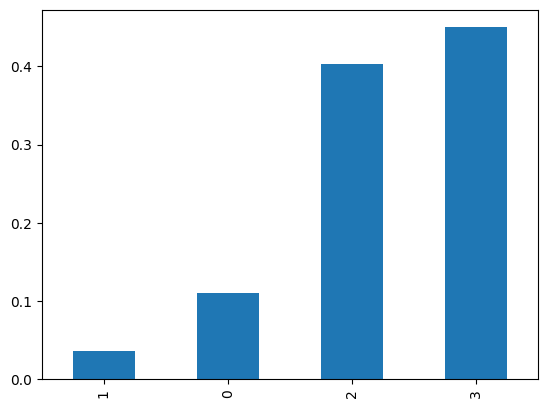

In [10]:
data_to_display = {"featue_names": iris.feature_names, "feature_importances": clf.feature_importances_}

import pandas as pd

data_to_display = pd.DataFrame(data_to_display)
data_to_display = data_to_display.sort_values(by = "feature_importances")

data_to_display["feature_importances"].plot.bar()